<a href="https://colab.research.google.com/github/wonjae124/python/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EB%AC%B4%ED%85%8C%ED%81%AC%EB%8B%89_1%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io

In [2]:
customer_master = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pyda100-master/1장/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [3]:
item_master = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pyda100-master/1장/item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pyda100-master/1장/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
#데이터를 세로 방향으로 결합(Union), 유니언
transaction_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pyda100-master/1장/transaction_2.csv')
transaction_2.head()

transaction_detail_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pyda100-master/1장/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [6]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index = True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:

print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))


5000
1786
6786


In [8]:
transaction_detail_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pyda100-master/1장/transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pyda100-master/1장/transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], #데이터 프레임 변수에 저장
                               ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [9]:
print(len(transaction_detail_2))
print(len(transaction_detail_1))
print(len(transaction_detail))

2144
5000
7144


In [10]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id","payment_date","customer_id"]],on ="transaction_id",how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [11]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on = "item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [12]:
#tech5. 필요한 데이터 칼럼을 만들자(데아터 가공)
join_data["price"] = join_data["quantity"]*join_data["item_price"]
join_data[["quantity","item_price","price"]].head()


,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [13]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [14]:
#verfication data
join_data["price"].sum()==transaction["price"].sum()

True


# Tech. 007. 각종 통계량을 파악


In [15]:
#코드의 결손치 개수를 출력
#isnull()은 True/False 반환
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [16]:
#describe는 숫자데이터를 집계해준다.
#데이터 개수(count), 평균값(mean), 표준편차(std), 최솟값(min), 사분위수(25%, 75%)
#price의 %75를 보면 단가가 210,000원인 컴퓨터를 2대 산 사람이이 있음.
#quantity의 max를 보면 4이지만 75%는 1이기 때문에 대부분의 사람들은 한 개를 구매한다.
#age는 Min 20살부터 Max 80살까지다.

join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [17]:
print(join_data["payment_date"].min()) #가장 과거일 = 제일 낮은 숫자
print(join_data["payment_date"].max()) #가장 최근 일 = 제일 높은 숫자

2019-02-01 01:36:57
2019-07-31 23:41:38


#**Tech**. 008.** 월별로 데이터를 집계해 보자

---



In [18]:
join_data.dtypes #payment_data의 데이터형 확인

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [19]:
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000,100000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000,85000


In [20]:
#오브젝트형 데이터 타입인 payment_date를 가공하겠다.
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"]) #연월일->일(datetime)


In [21]:
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000,100000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000,85000


In [22]:
join_data.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
dtype: object

payment_date가 object에서 datetime64로 변했다.

In [23]:
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m") #데이트타임 형식의의 연월일 -> 판다스의 데이트 타임의 dt함수로 연월로 변경 함
join_data[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


#**Tech**. 009.* 월별, 상품별로 데이터 집계해 보자
---



In [24]:
join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]] #월별, 상품별 매출 합계, 상품 데이터 집계

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [25]:
#pivot table로 행과 칼럼을 지정 해서 좀 더 편하게 시각화 할 수 있다.
#행은 index, 열은 columns, 데이터 축약방법(sum, mean)은 aggfunc parameter 사용
pd.pivot_table(join_data, index="item_name", columns ='payment_month', values = ['price','quantity'], aggfunc='sum')


price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

#**Tech**. 010.** 상품별 매출 추이를 가시화 해보자
---



In [26]:
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000,201902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000,180000,201907
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000,85000,201907
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000,100000,201907
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000,85000,201907


In [27]:
#행을 지불월, 열을 품목명으로 구성하고 내부 자료는 가격과 총합을 구함.
graph_data = pd.pivot_table(join_data, index='payment_month', columns ='item_name', values = 'price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


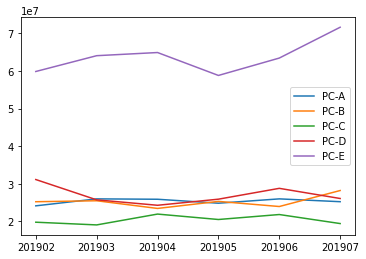

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
#노트북을 실행한 브라우저에 바로 볼 수 있게 만든다.
#아래 그래프는 2019.02 ~2019.07 동안 매월 품목별 매출을 표기하도록 함.
#plt그래프는 가로축,세로축 순서로 지정한다. graph_data.index로 payment_moth 지정하고 graph_data["PC-A"]로 매출액(price)를 표시함.
#보라색 그래프인 PC-E가 매출을 견인하는 기준이 된다!!!!!!!!!!!!
plt.plot(list(graph_data.index), graph_data["PC-A"], label = 'PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label = 'PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label = 'PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label = 'PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label = 'PC-E')
plt.legend() #범례 표기